------DATA EXPLORATION----- :
**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
import pandas as pd
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [4]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are. What are the dimensions of the dataframe?

In [5]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?

In [8]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


-----DATA CLEANING-----

Let's fix the date format to make it more readable

In [9]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


-----DATA MANIPULATION-----
**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [11]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [12]:
reshaped_df.shape
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [13]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [14]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head() 

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [15]:
reshaped_df.isna().values.any()

False

-----DATA VISUALISATION-----

**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/mamatplotlibtplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

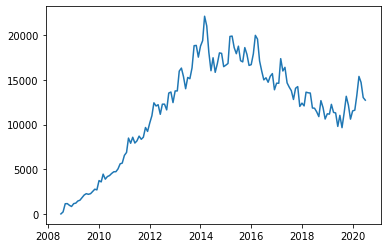

In [17]:
import matplotlib.pyplot as plt
plt.plot(reshaped_df.index, reshaped_df['java'])